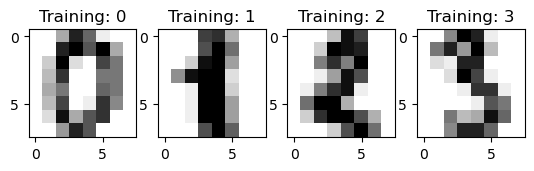

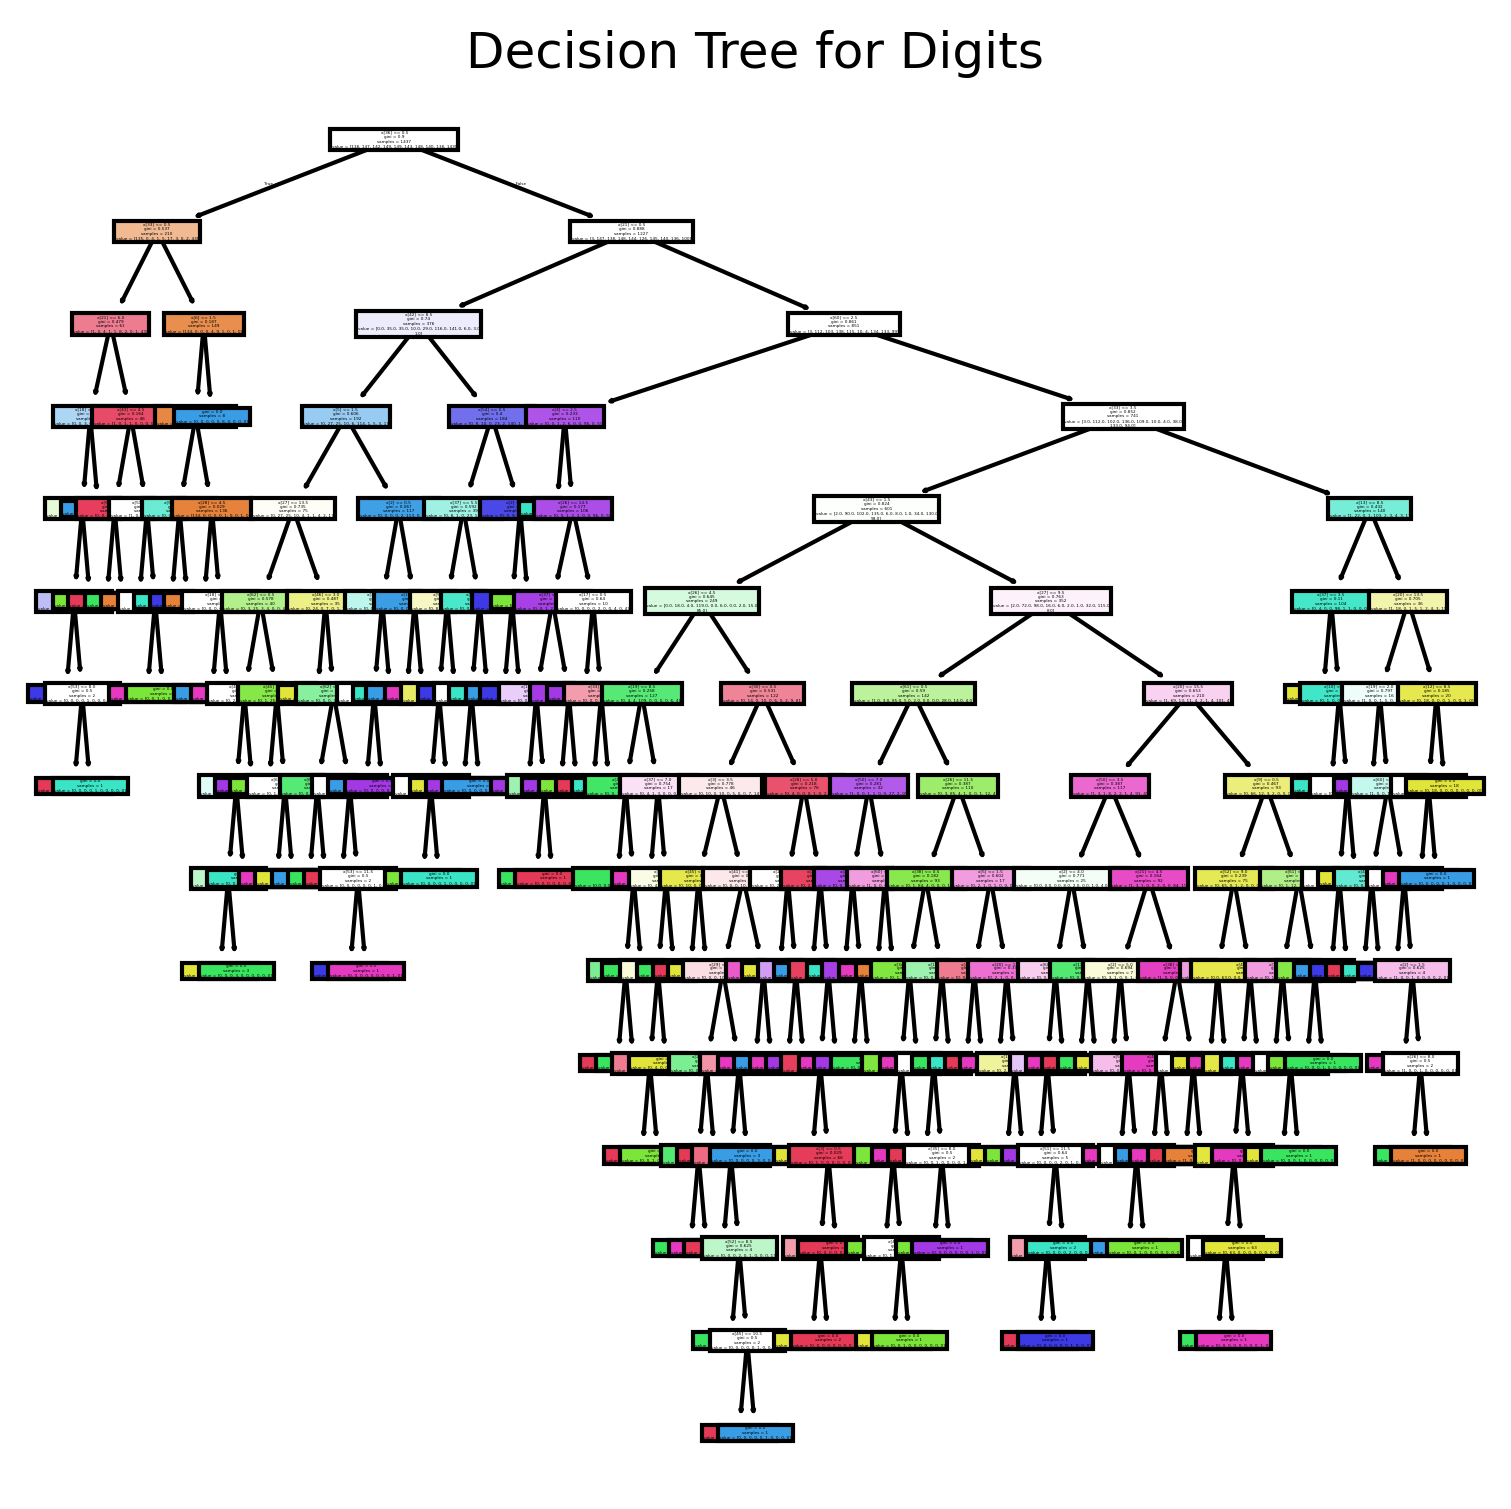

決策樹進行數字(Digit)影像預測: [3 9 8 3 3 7 5 8 2 5 5 0 1 5 4 4 2 0 2 2 9 0 5 4 7 4 3 0 3 1]
數字(Digit)影像真實值: [3 9 8 3 3 7 5 8 2 5 5 0 1 5 4 4 5 0 3 2 9 0 5 4 7 4 3 0 9 1]
數字(Digits)影像預測準確率: 0.87


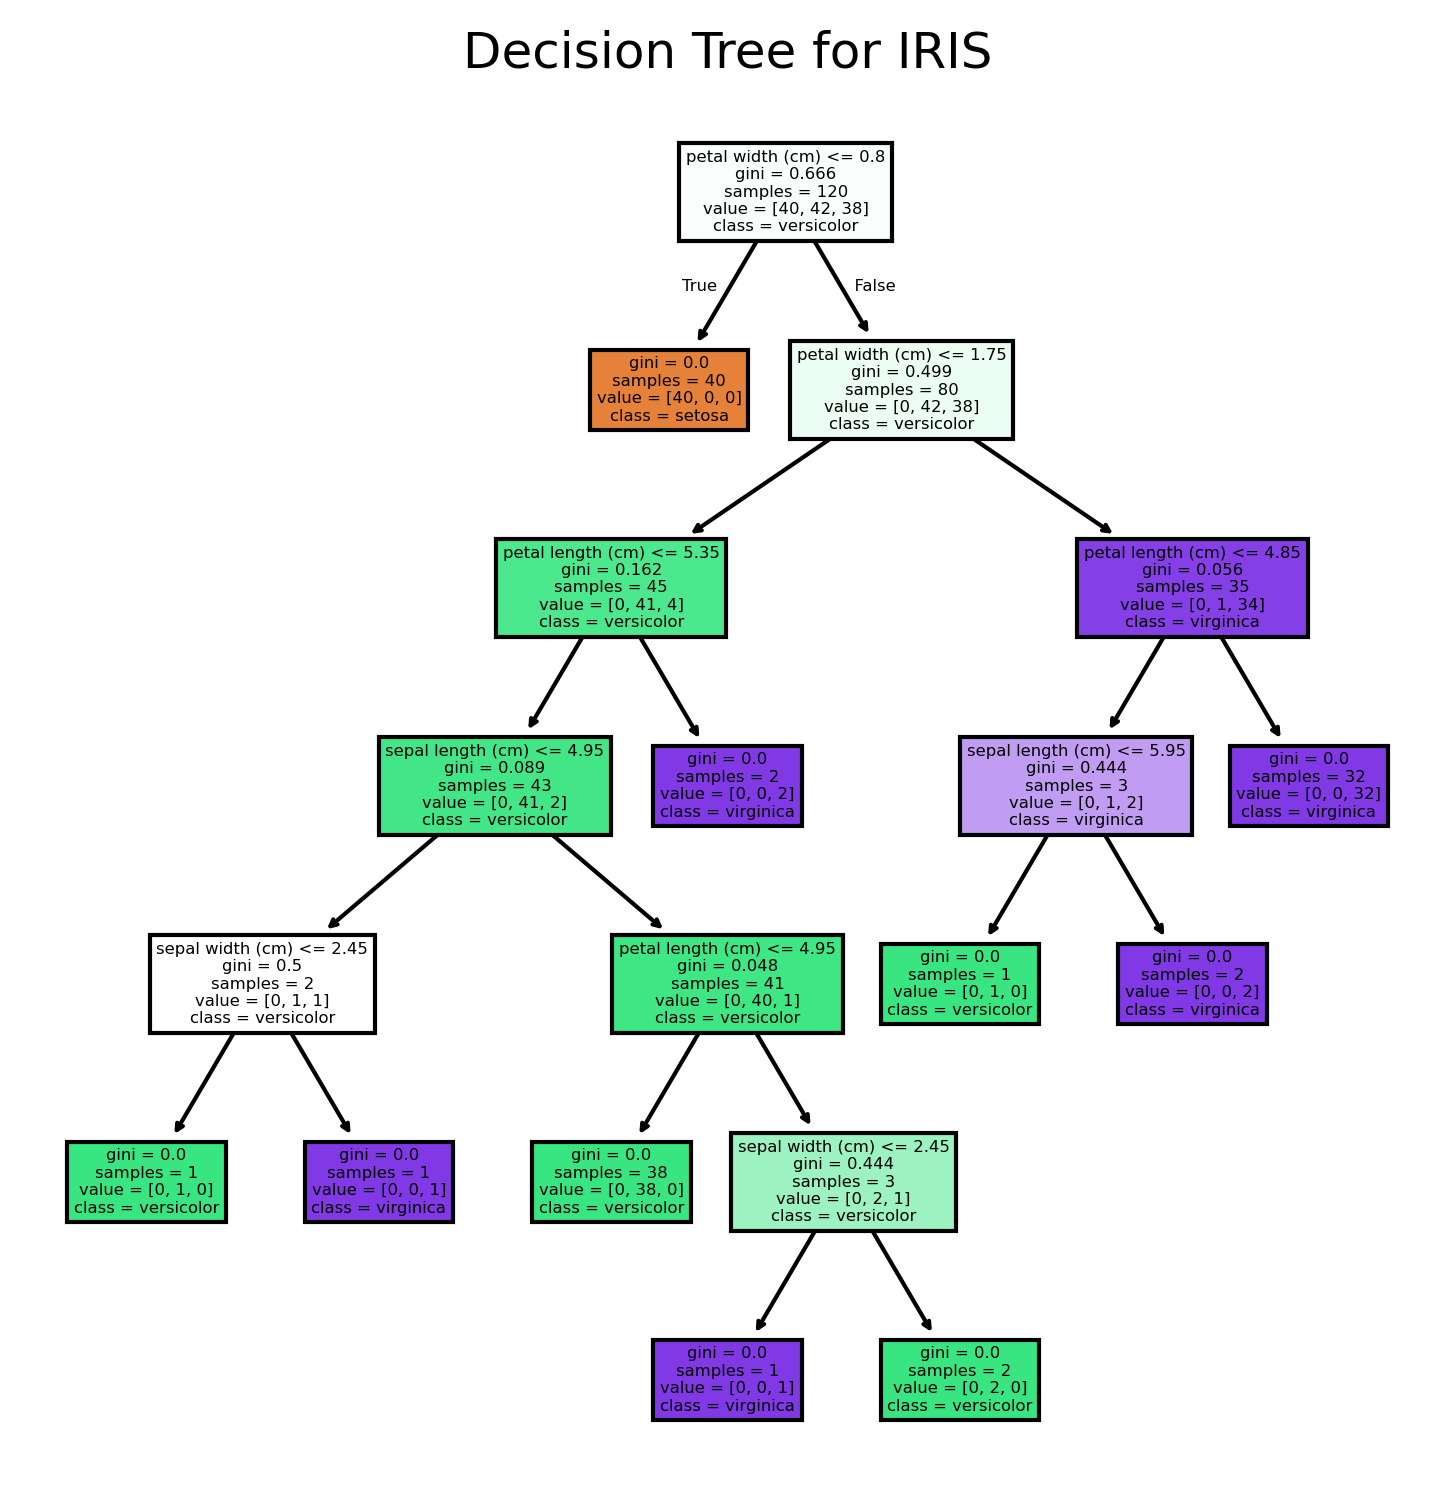

決策樹進行IRIS預測: [1 2 1 0 2 1 1 1 0 0 0 2 0 2 2 0 1 0 1 2 1 2 2 2 0 1 2 0 0 2]
IRIS真實值: [1 2 2 0 2 1 1 1 0 0 0 2 0 2 2 0 1 0 1 2 1 2 2 2 0 1 2 0 0 2]
IRIS預測準確率: 0.97


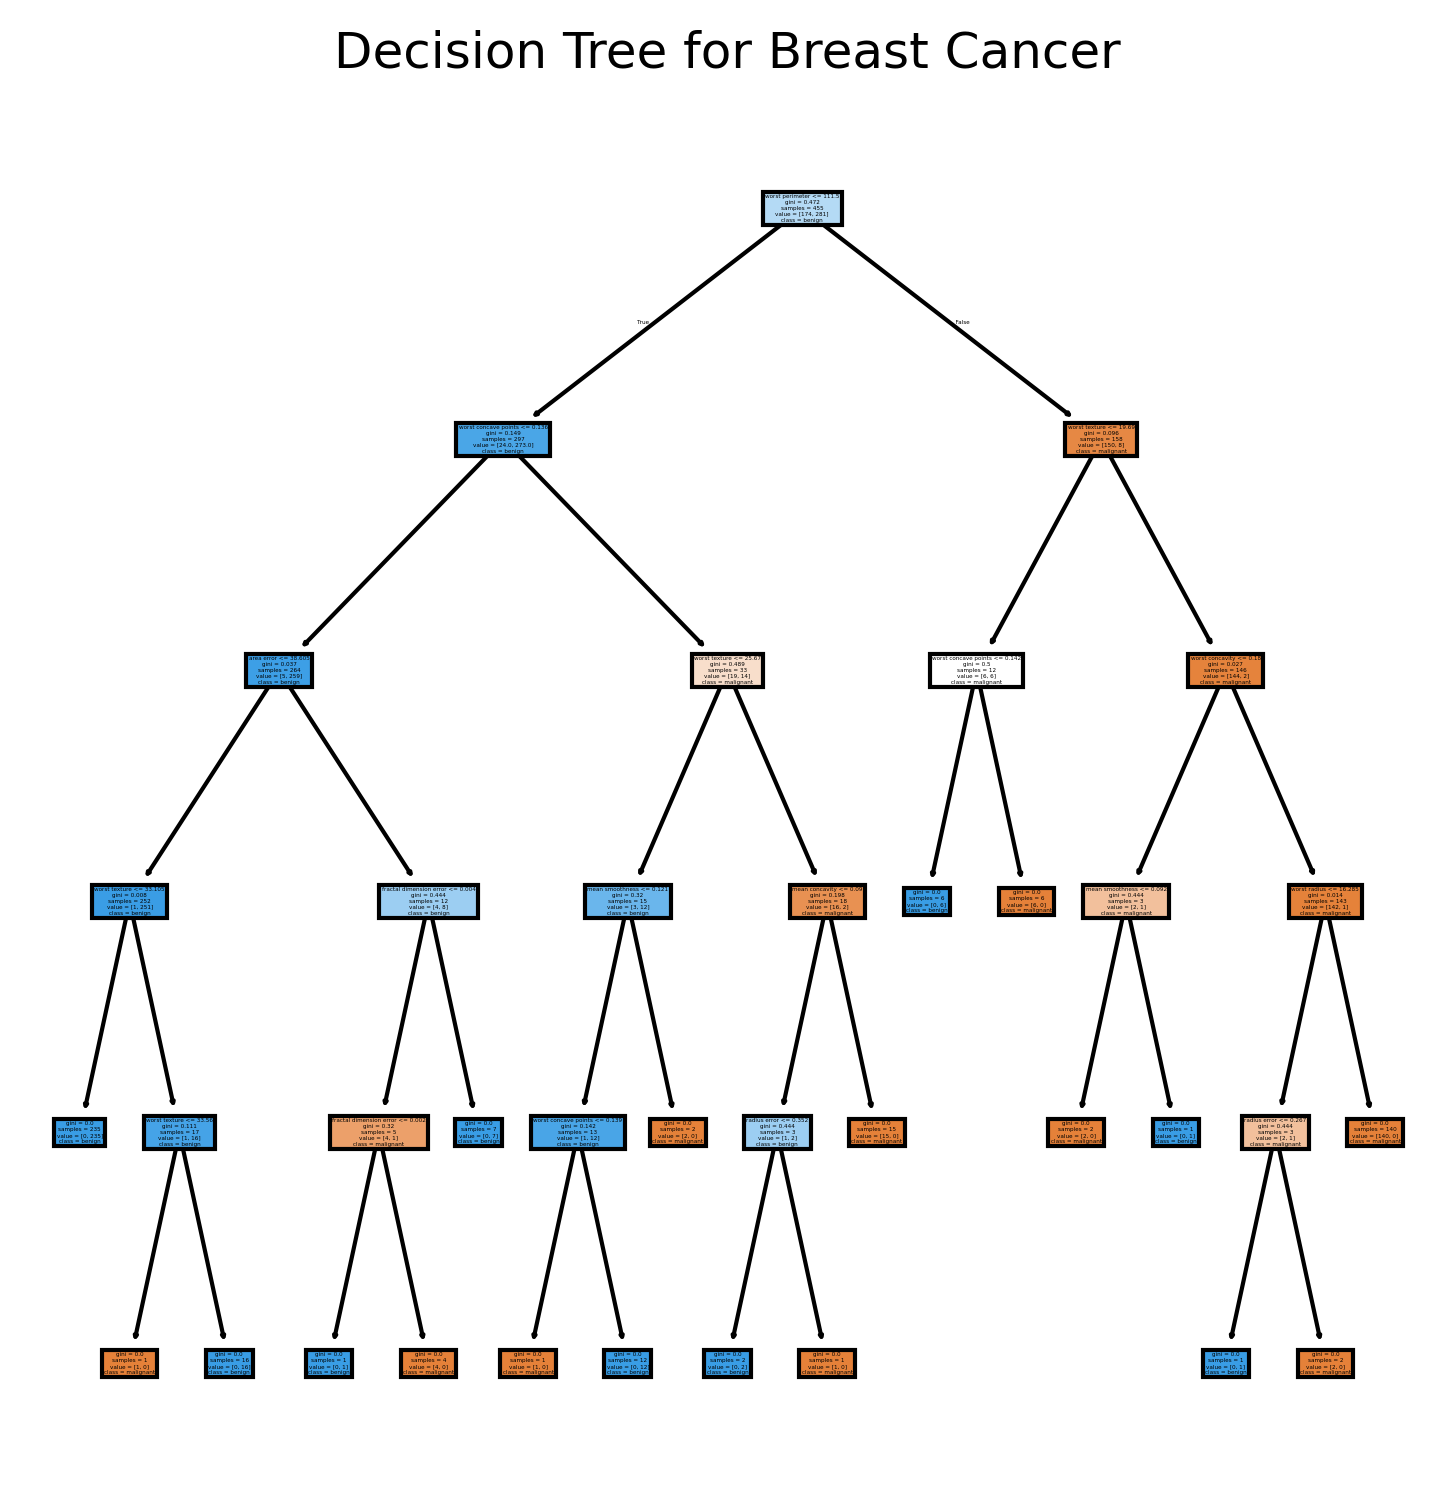

決策樹進行Breast Cancer預測: [0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0]
Breast Cancer真實值: [0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1]
Breast Cancer預測準確率: 0.91


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def load_datasets():
    return datasets.load_digits(), datasets.load_iris(), datasets.load_breast_cancer()

def DecisionTreeImage(data): # 處理多維度資料, digits.images(1797, 8, 8)
    Dtree = tree.DecisionTreeClassifier() # 建立空的決策樹框架，都沒設定就是用預設參數
    n_samples = len(data.images) # 有幾張圖片(np.array)
    data_images = data.images.reshape((n_samples, -1)) # 本來是(1797, 8, 8) reshape成二維(1797, 64)
    train_data, test_data, train_label, test_label = train_test_split(data_images, data.target, test_size=0.2) # 切訓練、測試資料
    clf = Dtree.fit(train_data, train_label) # 餵訓練資料來訓練模型

    ## 從 scikit-learn 版本 21.0 開始，可以使用 scikit-learn 的 tree.plot_tree 方法來利用 matplotlib 將決策樹視覺化，而不再需要依賴於難以安裝的 dot 庫。
    ## thh adds the codes
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=300)
    tree.plot_tree(clf, filled=True) # Matplotlib 內建的 plot_tree() 方法來視覺化決策樹
    plt.title("Decision Tree for Digits")
    plt.show()  # 顯示決策樹，而不是存成圖片

    print('決策樹進行數字(Digit)影像預測:', clf.predict(test_data)[:30])
    print('數字(Digit)影像真實值:', test_label[:30])
    acc = accuracy_score(test_label, clf.predict(test_data))
    print("數字(Digits)影像預測準確率:", round(acc, 2))

def DecisionTreeValue(data, src='IRIS'): #處理二維資料, iris.data已經是二維 data
    Dtree = tree.DecisionTreeClassifier()
    train_data, test_data, train_label, test_label = train_test_split(data.data, data.target, test_size=0.2)
    clf = Dtree.fit(train_data, train_label)

    ## 從 scikit-learn 版本 21.0 開始，可以使用 scikit-learn 的 tree.plot_tree 方法來利用 matplotlib 將決策樹視覺化，而不再需要依賴於難以安裝的 dot 庫。
    ## thh adds the codes
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=300)
    tree.plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
    plt.title(f"Decision Tree for {src}")
    plt.show()  # 顯示決策樹，而不是存成圖片

    print(f'決策樹進行{src}預測:', clf.predict(test_data)[:30]) # 看前30筆資料的預測狀況
    print(f'{src}真實值:', test_label[:30])
    acc = accuracy_score(test_label, clf.predict(test_data))
    print(f"{src}預測準確率:", round(acc, 2))

def show_digits_images(data):
    for i in range(0, 4):
        plt.subplot(2, 4, i + 1)
        plt.axis('on')
        imside = int(np.sqrt(data.data[i].shape[0]))
        im1 = np.reshape(data.data[i], (imside, imside))
        plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(f'Training: {data.target[i]}')
    plt.show()

digits, iris, cancer = load_datasets()
show_digits_images(digits)

DecisionTreeImage(digits)
DecisionTreeValue(iris, src="IRIS")
DecisionTreeValue(cancer, src="Breast Cancer")
